In [1]:
import pandas as pd
import re
import string
import csv
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk import word_tokenize
from spellchecker import SpellChecker
import matplotlib.pyplot as plt

# Data 

In [2]:
twitter=pd.read_csv(r"C:\Users\pawan_300\Desktop\Project work\ml files\ml project\tweets.csv")

In [12]:
twitter.head(5)

,Text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,Sentiment,Sentiment_score
0,RT In You fourth final instalment Jon Goyens ...,False,0,NaN,4/6/2019 17:11,False,NaN,1.110000e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",coachescounsel,1,True,False,neutral,0.000000
1,RT Weve got As Soon As Possible exciting news...,False,0,NaN,4/6/2019 17:11,False,NaN,1.110000e+18,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",brglilly,1,True,False,positive,0.219048
2,The outcome PRIOR CHESTNUTS FUNDRAISER March U...,False,0,NaN,4/6/2019 17:11,True,NaN,1.110000e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",tcsbybloomex,0,False,False,neutral,0.000000
3,New india old india UFEEUFF,False,0,anandmahindra,4/6/2019 17:10,False,1.110000e+18,1.110000e+18,34197952.0,"<a href=""http://twitter.com/download/iphone"" r...",JavedKhjaak,0,False,False,positive,0.118182
4,TCS Developing Five Blockchain Platforms,False,0,NaN,4/6/2019 17:09,False,NaN,1.110000e+18,NaN,"<a href=""http://localhost.com"" rel=""nofollow"">...",devnullius,0,False,False,neutral,0.000000


# Cleaning

In [4]:
def stopword():
    stop=stopwords.words("english")
    twitter["Text"]=twitter["Text"].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))#Stopword removal

In [5]:
def remove():
    twitter["Text"]=twitter["Text"].apply(lambda x:re.sub(r"http\S+",'', x)) #for url
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",'',x)) #for email
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub('@[^\s]+','',x)) #for username
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub('#[^\s]+','',x)) #for trending # words
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub('\$\w*','',x)) 

In [6]:
stopword()
remove()

In [8]:
punct_num = '''!()-àÂ[]{};:\n,<>./?@#%^"&\*_~0123456789=\x92\x92\x96\x85+|'"''' #for punctuation
def punctuation(x):
    no_punct = ""
    for char in x:
            if char not in punct_num :
                no_punct = no_punct + char  
    return(no_punct)
twitter['Text']=twitter['Text'].apply(lambda x:punctuation(x))

In [9]:
fileName = r"C:\Users\pawan_300\Desktop\Project work\ml files\ml project\slang.txt"
accessMode = "r"
def slang_translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        with open(fileName, accessMode) as myCSVfile:
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                if _str.upper() == row[0]:
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    return(' '.join(user_string))
twitter['Text']=twitter['Text'].apply(lambda x:slang_translator(x))

In [ ]:
spell = SpellChecker()
def spellcheck(x):
        correct={}
        wrong=spell.unknown(x.split())
        for t in wrong:
            correct[t]=spell.correction(t)
        for t in correct.keys():
            x= re.sub(t,correct[t],x,flags=re.IGNORECASE)
        return(x)
twitter['Text']=twitter['Text'].apply(lambda x:spellcheck(x)) #this will take some time 

## Polarity

In [10]:
def polarity():
    pole=[]
    t=[]
    for line in twitter["Text"]:
        temp=TextBlob(line).sentiment.polarity
        t.append(temp)
        if(temp>0):
            pole.append('positive')
        elif(temp<0):
            pole.append('negative')
        else:
            pole.append('neutral')
    return(pole,t)
pole,temp=polarity()
twitter['Sentiment']=pole
twitter['Sentiment_score']=temp

(array([2125.,    0.,    0.,    0.,    0., 1928.,    0.,    0.,    0.,
         519.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

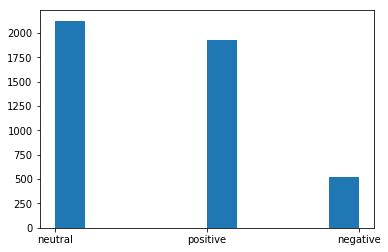

In [11]:
plt.hist(pole,histtype='bar',align='mid')